# Understanding initial data
# 
>This file will be used to understand the data, for both data exploratory but mainly to see incremental changes on etl 

The exploratory was done before the **Transformation** on etl.py be implemented, here, I understood what was necessary to do on transformation

### Consumers data

In [2]:
import pandas as pd
import pyarrow.parquet as pq
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Reading file
df_consumers = pq.read_table("../data/extracted/consumers.parquet")
df_consumers = df_consumers.to_pandas()
df_consumers.head()


,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number
0,e8cc60860e09c0bb19610b06ced69c973eb83982cfc98e...,pt-br,2018-04-05T14:49:18.165Z,True,NUNO,46,816135924
1,a2834a38a9876cf74e016524dd2e8c1f010ee12b2b684d...,pt-br,2018-01-14T21:40:02.141Z,True,ADRIELLY,59,231330577
2,41e1051728eba13341136d67d0757f8d8cc44b2a405b71...,pt-br,2018-01-07T03:47:15.554Z,True,PAULA,62,347597883
3,8e7c1dcb64edf95c935147f6d560cb068c44714cb1b21b...,pt-br,2018-01-10T22:17:08.160Z,True,HELTON,13,719366842
4,7823d4cf4150c5daeae0bd799206852fc123bdef0cf5d1...,pt-br,2018-04-06T00:16:20.935Z,True,WENDER,76,543232158


In [22]:
# Verifying data types
df_consumers.info()

# Judgement - NECESSARY TO CHANGE CREATE_AT DATA TYPE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806156 entries, 0 to 806155
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customer_id            806156 non-null  object
 1   language               806156 non-null  object
 2   created_at             806156 non-null  object
 3   active                 806156 non-null  bool  
 4   customer_name          806155 non-null  object
 5   customer_phone_area    806156 non-null  int64 
 6   customer_phone_number  806156 non-null  int64 
dtypes: bool(1), int64(2), object(4)
memory usage: 37.7+ MB


In [4]:
print(df_consumers.isnull().sum())

customer_id              0
language                 0
created_at               0
active                   0
customer_name            1
customer_phone_area      0
customer_phone_number    0
dtype: int64


In [27]:
# Quantity of active users
df_consumers['created_at'] = pd.to_datetime(df_consumers['created_at'])
df_consumers['created_date'] = pd.to_datetime(df_consumers['created_at']).dt.date

df_consumers[["created_date", "customer_id"]].groupby("created_date") \
                                             .nunique() \
                                             .sort_values(by='customer_id', ascending=False) \
                                             .reset_index()

,created_date,customer_id
0,2018-04-06,191054
1,2018-04-05,121104
2,2018-01-03,49160
3,2018-01-02,36792
4,2018-01-07,36197
...,...,...
90,2018-03-28,555
91,2018-04-02,530
92,2018-04-03,492
93,2018-03-27,480


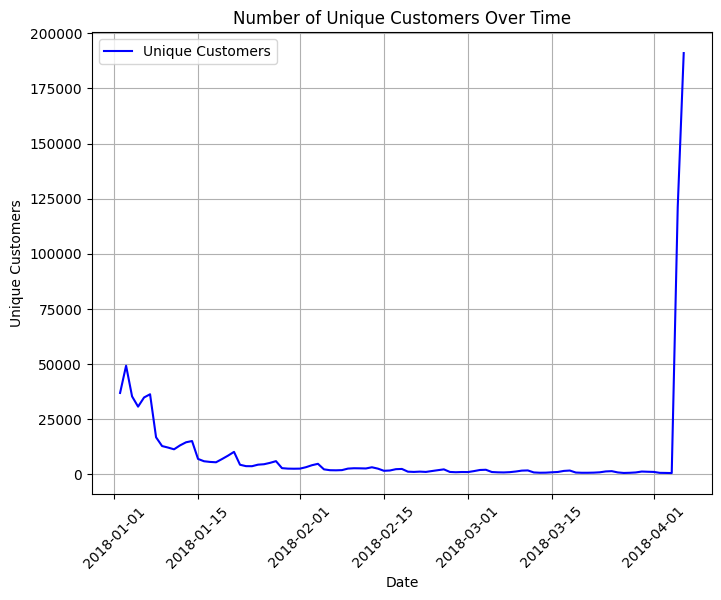

In [6]:
import matplotlib.pyplot as plt

# Aggregating unique customer count by created_date
df_grouped = df_consumers[["created_date", "customer_id"]].groupby("created_date").nunique().reset_index()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(df_grouped["created_date"], df_grouped["customer_id"], linestyle="-", color="b", label="Unique Customers")

# Formatting information for display
plt.xlabel("Date")
plt.ylabel("Unique Customers")
plt.title("Number of Unique Customers Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [7]:
df_consumers[df_consumers['created_at'].str.contains('2018-04-06')].head()

,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number,created_date
4,7823d4cf4150c5daeae0bd799206852fc123bdef0cf5d1...,pt-br,2018-04-06T00:16:20.935Z,True,WENDER,76,543232158,2018-04-06
14,5a2ad15e9ddf745adc7f0b355491f0815e583666bb21f4...,pt-br,2018-04-06T02:56:13.915Z,True,SAMUEL,56,746582509,2018-04-06
15,435346c38095dffef797a3f39cb982dc7a83c8b3673c1b...,pt-br,2018-04-06T04:25:40.847Z,True,RICKY,85,987206495,2018-04-06
30,e5b253944d52a7d30c1a7fd29cda81d80b0959b77786da...,pt-br,2018-04-06T04:14:52.995Z,True,RICARDO,50,975691498,2018-04-06
32,f505553ebe6d7e174d1f3cb9dfc29a3f3d9daa41926943...,pt-br,2018-04-06T01:32:13.045Z,True,DEFAULT,47,760429973,2018-04-06


In [8]:
# Amount of active / inactive customers -> Only less than 1% is inactive, not relevant enough
df_consumers[["customer_id", "active"]].groupby("active").nunique()

,customer_id
active,
False,1595
True,804561


In [9]:
# Dictionary with the relation of DDD and states
state_ddd = {
    11: "SP", 12: "SP", 13: "SP", 14: "SP", 15: "SP", 16: "SP", 17: "SP", 18: "SP", 19: "SP",
    21: "RJ", 22: "RJ", 24: "RJ",
    27: "ES", 28: "ES",
    31: "MG", 32: "MG", 33: "MG", 34: "MG", 35: "MG", 37: "MG", 38: "MG",
    41: "PR", 42: "PR", 43: "PR", 44: "PR", 45: "PR", 46: "PR",
    47: "SC", 48: "SC", 49: "SC",
    51: "RS", 53: "RS", 54: "RS", 55: "RS",
    61: "DF",
    62: "GO", 64: "GO",
    63: "TO",
    65: "MT", 66: "MT",
    67: "MS",
    68: "AC",
    69: "RO",
    71: "BA", 73: "BA", 74: "BA", 75: "BA", 77: "BA", 79: "SE",
    81: "PE", 87: "PE",
    82: "AL",
    83: "PB",
    84: "RN",
    85: "CE", 88: "CE",
    86: "PI", 89: "PI",
    91: "PA", 93: "PA", 94: "PA",
    92: "AM", 97: "AM",
    95: "RR",
    96: "AP",
    98: "MA", 99: "MA"
}

In [10]:
# Add a new column to map the states
df_consumers["customer_state"] = df_consumers["customer_phone_area"].map(state_ddd)
df_consumers.isna().count()


customer_id              806156
language                 806156
created_at               806156
active                   806156
customer_name            806156
customer_phone_area      806156
customer_phone_number    806156
created_date             806156
customer_state           806156
dtype: int64

In [11]:
print("Amount of customer with state:", df_consumers["customer_state"].count())
print("Amount of customer without a state:", df_consumers["customer_state"].isna().count())

Amount of customer with state: 539926
Amount of customer without a state: 806156


In [11]:
#Checking duplicates
df_consumers[df_consumers["customer_id"].duplicated(keep=False) == True]

,customer_id,language,created_at,active,customer_name,customer_phone_area,customer_phone_number


<br></br>
## Restaurants Data

In [6]:
df_restaurants = pq.read_table("../data/extracted/restaurants.parquet")
df_restaurants = df_restaurants.to_pandas()
df_restaurants.head()

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
0,d19ff6fca6288939bff073ad0a119d25c0365c407e9e5d...,2017-01-23T12:52:30.910Z,False,3,60.0,0,50.0,30.0,14025,RIBEIRAO PRETO,SP,BR
1,631df0985fdbbaf27b9b031a8f381924e3483833385748...,2017-01-20T13:14:48.286Z,True,3,60.0,0,0.0,30.0,50180,SAO PAULO,SP,BR
2,135c5c4ae4c1ec1fdc23e8c649f313e39be8db913d8bc5...,2017-01-23T12:46:33.457Z,True,5,100.0,0,45.0,10.0,23090,RIO DE JANEIRO,RJ,BR
3,d26f84c470451f752bef036c55517b6d9950d41806f10e...,2017-01-20T13:15:04.806Z,True,3,80.0,0,0.0,18.9,40255,SALVADOR,BA,BR
4,97b9884600ea7192314580d9115f8882b8634f5aa201ff...,2017-01-20T13:14:27.701Z,True,3,60.0,0,0.0,25.0,64600,BARUERI,SP,BR


In [13]:
# Checking types
#   Changes -> created_at - to date
print(df_restaurants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7292 non-null   object 
 1   created_at           7292 non-null   object 
 2   enabled              7292 non-null   bool   
 3   price_range          7292 non-null   int64  
 4   average_ticket       7292 non-null   float64
 5   takeout_time         7292 non-null   int64  
 6   delivery_time        7291 non-null   float64
 7   minimum_order_value  7197 non-null   float64
 8   merchant_zip_code    7292 non-null   int64  
 9   merchant_city        7292 non-null   object 
 10  merchant_state       7292 non-null   object 
 11  merchant_country     7292 non-null   object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 633.9+ KB
None


In [14]:
# Checking for missing values
print(df_restaurants.isnull().sum())

id                      0
created_at              0
enabled                 0
price_range             0
average_ticket          0
takeout_time            0
delivery_time           1
minimum_order_value    95
merchant_zip_code       0
merchant_city           0
merchant_state          0
merchant_country        0
dtype: int64


In [15]:
# Summary statistics
print(df_restaurants.describe())

       price_range  average_ticket  takeout_time  delivery_time  \
count  7292.000000     7292.000000   7292.000000    7291.000000   
mean      2.561300       53.726824      3.183900      28.034975   
std       1.180094       19.562103      8.422498      25.246657   
min       1.000000        0.000000      0.000000       0.000000   
25%       2.000000       40.000000      0.000000       0.000000   
50%       3.000000       60.000000      0.000000      35.000000   
75%       3.000000       60.000000      0.000000      50.000000   
max       5.000000      100.000000     60.000000     285.000000   

       minimum_order_value  merchant_zip_code  
count          7197.000000        7292.000000  
mean             28.797759       46125.429923  
std            1178.642727       25936.938647  
min               0.000000           0.000000  
25%               0.000000       22640.000000  
50%              15.000000       41230.000000  
75%              21.900000       70050.000000  
max         

In [16]:
# Count of restaurants by city
city_counts = df_restaurants['merchant_city'].value_counts()
print(city_counts)

# Count of restaurants by state
state_counts = df_restaurants['merchant_state'].value_counts()
print(state_counts)

merchant_city
SAO PAULO         1788
RIO DE JANEIRO     944
BRASILIA           372
BELO HORIZONTE     337
FORTALEZA          200
                  ... 
ANANINDEUA           1
PIRAQUARA            1
PETROPOLIS           1
JAU                  1
BLUMENAU             1
Name: count, Length: 157, dtype: int64
merchant_state
SP    3127
RJ    1170
MG     556
DF     372
PR     372
RS     251
CE     202
BA     190
SC     183
PE     179
GO     152
ES     115
RN      90
PB      85
AM      56
PA      50
MS      41
SE      30
AL      29
MA      20
MT      15
AC       4
PI       3
Name: count, dtype: int64


In [17]:
df_restaurants[df_restaurants["minimum_order_value"] > 250]

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country
3148,f9f6289912cbaa8987e059ee895ea2b3cf2dd7f68a6c50...,2017-01-20T13:15:01.092Z,True,1,30.0,0,0.0,100000.0,21381,RIO DE JANEIRO,RJ,BR


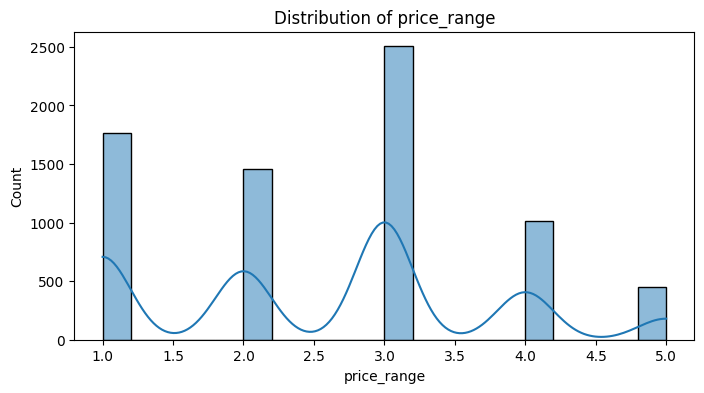

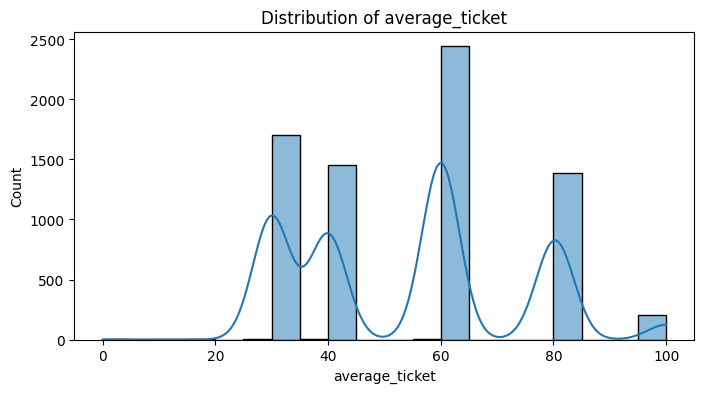

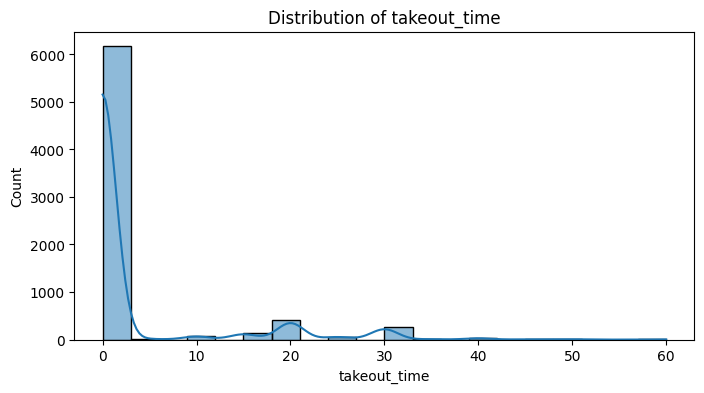

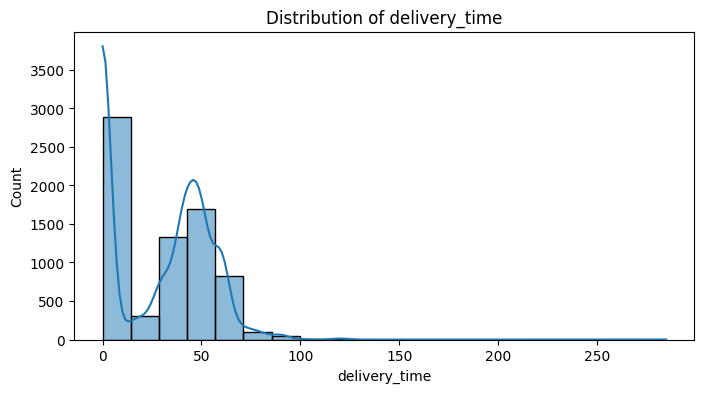

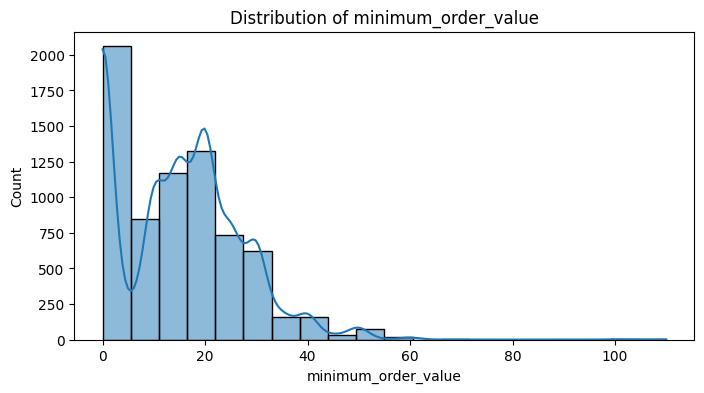

In [18]:
# Removing outlier in minimum order value
df_restaurants = df_restaurants[df_restaurants["minimum_order_value"] < 250]

# Plot data for each metric column
kpi_columns = ['price_range', 'average_ticket', 'takeout_time', 'delivery_time', 'minimum_order_value']
for col in kpi_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_restaurants[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

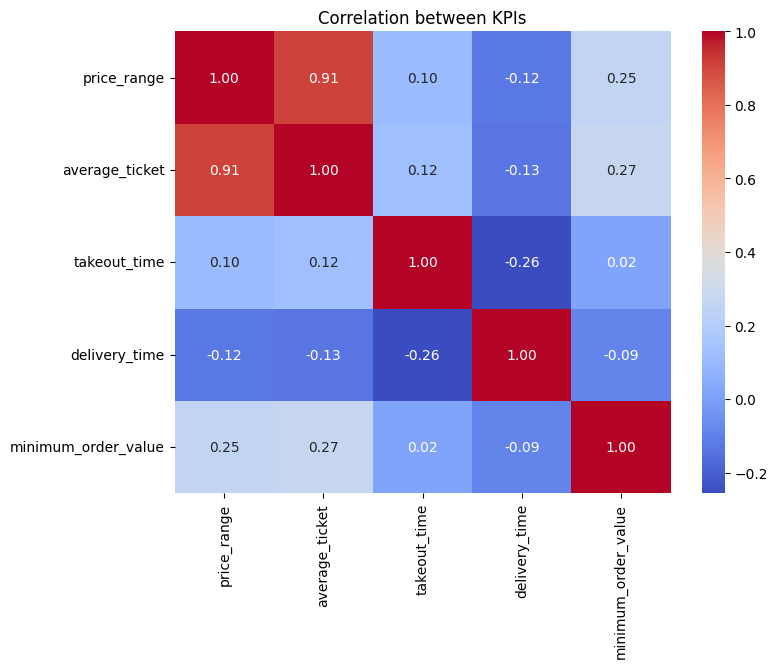

In [19]:
# Correlation between metrics
corr = df_restaurants[kpi_columns].corr()

# Plot correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between KPIs')
plt.show()

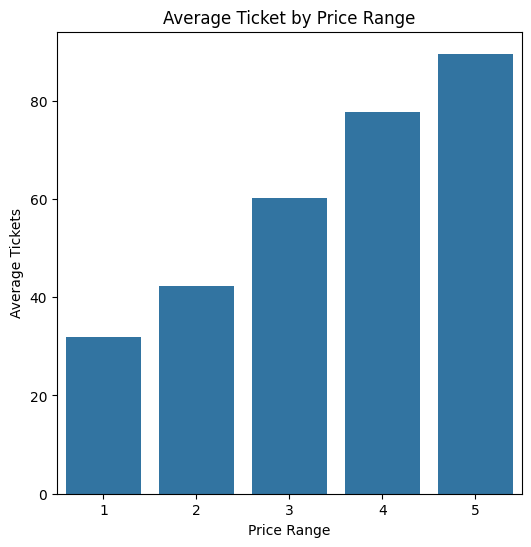

In [20]:
# Group by price_range and calculate mean average_ticket
price_ticket = df_restaurants.groupby('price_range')['average_ticket'].mean().reset_index()

# Plot relation between them
plt.figure(figsize=(6, 6))
sns.barplot(x='price_range', y='average_ticket', data=price_ticket)

plt.title('Average Ticket by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Tickets')

plt.show()

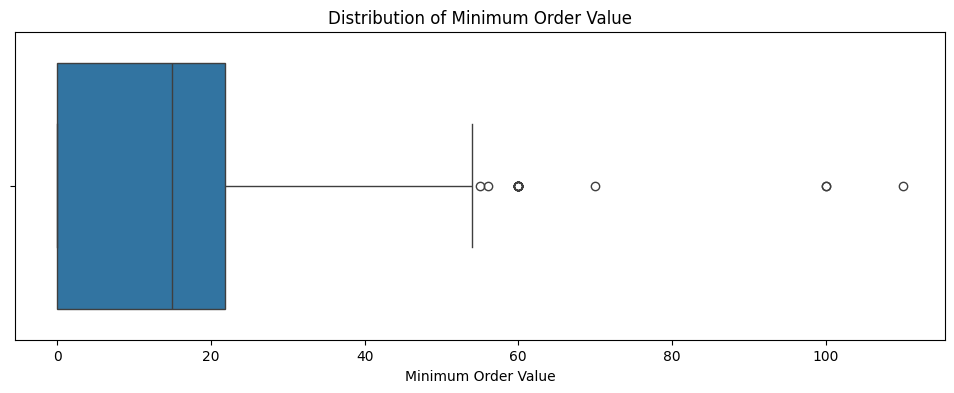

In [21]:
# Boxplot of minimum_order_value
plt.figure(figsize=(12, 4))

sns.boxplot(x=df_restaurants['minimum_order_value'])
plt.title('Distribution of Minimum Order Value')
plt.xlabel('Minimum Order Value')

plt.show()

# The median is ~18; meaning that 50% of the base has the min order value equal or lower than that 
# As the box goes until ~20, this means that we have a lower variability
# There's only a few outliers with over 60

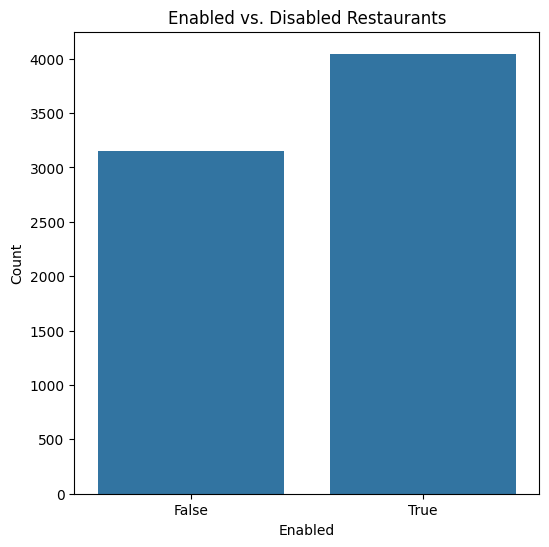

In [22]:
# Count of enabled vs. disabled restaurants
enabled_counts = df_restaurants['enabled'].value_counts()

# Plot the count
plt.figure(figsize=(6, 6))

sns.barplot(x=enabled_counts.index, y=enabled_counts.values)

plt.title('Enabled vs. Disabled Restaurants')
plt.xlabel('Enabled')
plt.ylabel('Count')

plt.show()

# Almost half of the restaurants are disabled, showing a big turnover of restaurants in the platform

In [8]:
# Checking duplicates
df_restaurants[df_restaurants["id"].duplicated(keep=False) == True]

,id,created_at,enabled,price_range,average_ticket,takeout_time,delivery_time,minimum_order_value,merchant_zip_code,merchant_city,merchant_state,merchant_country


<br></br>
# Orders

In [19]:
df_orders = pd.read_parquet("../data/extracted/orders.parquet")
df_orders.head()

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
0,80532101763,7ba88a68bb2a3504c6bd37a707af57a0b8d6e110a551c7...,GUSTAVO,FRANCA,BR,JARDIM ESPRAIADO,6736655,-47.39,-20.55,SP,...,a992a079a651e699d9149423761df2427c0e3af0a2a1b5...,-47.39,-20.55,America/Sao_Paulo,2019-01-17T22:50:06.000Z,33e0612d62e5eb42aba15b58413137e441fbe906de2feb...,False,46.0,ANDROID,None
1,43352103961,078acecdcf7fa89d356bfa349f14a8219db1ee161ce28a...,MICHELLE,SANTOS,BR,CAMPO GRANDE,8759216,-46.34,-23.96,SP,...,5152f28ee0518b8803ccf0a4096eb2ff8b81e9491861c9...,-46.34,-23.96,America/Sao_Paulo,2019-01-17T17:51:26.000Z,148c4353a2952f3fe7973547283265eb22b575fb712ed2...,False,104.5,ANDROID,None
2,38650991217,0e38a3237b5946e8ab2367b4f1a3ae6e77f1e215bc760c...,VICTOR,GUARULHOS,BR,JARDIM ROSSI,8765930,-46.53,-23.44,SP,...,b6096419455c35d06105a5ef0d25c51f9dd40e1e99ac33...,-46.53,-23.44,America/Sao_Paulo,2019-01-17T22:53:47.000Z,c37e495a91b498bb7b70a9e09ac115d0cdd443f152dc11...,False,35.0,IOS,None
3,63579726866,cab1a004b7206d07910092c515a79834fea0a03d7d9054...,ANNIE,SAO PAULO,BR,PARQUE SAO JORGE,7834087,-46.57,-23.53,SP,...,082bfdcdf6ccdc343e3c4d25ee376b5b6ca7e96ad8b04e...,-46.57,-23.53,America/Sao_Paulo,2019-01-17T23:56:53.000Z,b4df94142d21354611247da9ca94f870c09b93989b531a...,False,40.8,IOS,None
4,90617788806,aa7edf5b166b8c843aec3b96dc561222888734f3879123...,DANIEL,VITORIA,BR,JARDIM CAMBURI,7211683,-40.27,-20.25,ES,...,d7adb764bac29ccb77fb8f746ffbd531bf05ec30a7e130...,-40.27,-20.25,America/Sao_Paulo,2019-01-17T23:40:53.000Z,4ff64b33b272c1886df21b63272220af6a82d1667dba70...,False,48.5,ANDROID,None


In [18]:
# Understanding the dataset
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427415 entries, 0 to 2427414
Data columns (total 22 columns):
 #   Column                        Dtype              
---  ------                        -----              
 0   cpf                           object             
 1   customer_id                   object             
 2   customer_name                 object             
 3   delivery_address_city         object             
 4   delivery_address_country      object             
 5   delivery_address_district     object             
 6   delivery_address_external_id  object             
 7   delivery_address_latitude     object             
 8   delivery_address_longitude    object             
 9   delivery_address_state        object             
 10  delivery_address_zip_code     object             
 11  items                         object             
 12  merchant_id                   object             
 13  merchant_latitude             object             
 14  me

In [5]:
# Summary statistics for numerical columns
print(df_orders.describe())

       order_total_amount
count        3.670826e+06
mean         4.790006e+01
std          1.196738e+02
min          0.000000e+00
25%          2.690000e+01
50%          3.990000e+01
75%          5.740000e+01
max          1.387509e+05


In [7]:
# Check for missing values
print(df_orders.isnull().sum())

cpf                                   0
customer_id                        8505
customer_name                         0
delivery_address_city                 0
delivery_address_country              0
delivery_address_district             0
delivery_address_external_id          0
delivery_address_latitude             0
delivery_address_longitude            0
delivery_address_state                0
delivery_address_zip_code             0
items                                 0
merchant_id                           0
merchant_latitude                     0
merchant_longitude                    0
merchant_timezone                     0
order_created_at                      0
order_id                              0
order_scheduled                       0
order_total_amount                    0
origin_platform                       2
order_scheduled_date            3670326
dtype: int64


In [8]:
# Checking data without customer_id
df_orders[df_orders["customer_id"].isna()]

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
255,78812348914,None,ELAINE,RIO DE JANEIRO,BR,CASCADURA,6947721,-43.33,-22.88,RJ,...,87d03fe6c8db95f58d801ce78834566131c5ae46387b4b...,-43.33,-22.88,America/Sao_Paulo,2019-01-13T14:09:38.000Z,653d87f714e6e40260de58014bfe284bb8528852b63cae...,False,37.50,DESKTOP,None
322,05486225449,None,Ricardo,SALVADOR,BR,ARMACAO,8929444,-38.44,-12.99,BA,...,60bebc1d768199de1f309b3224a3e4e0732c08cedec08b...,-38.44,-12.99,America/Bahia,2019-01-31T23:07:11.000Z,22eeeb0092fda70b1b7a7f6789f096aacdd3112c8f3a1a...,False,34.50,DESKTOP,None
1268,15610232444,None,IGOR,NATAL,BR,PITIMBU,8558933,-35.25,-5.86,RN,...,88c948b45a4b565a14626043eeb1892f031f0d5b7493d5...,-35.25,-5.86,America/Fortaleza,2019-01-03T21:50:58.000Z,02d3a8f4754175437348607ee20e35754f45a934a02af7...,False,44.75,ANDROID,None
2087,62968087496,None,Alberto,LAURO DE FREITAS,BR,BURAQUINHO,7488420,-38.29,-12.88,BA,...,a5d83cbbed351a5df424ea9628638d1ad87671c6db357e...,-38.29,-12.88,America/Bahia,2019-01-25T01:34:58.000Z,a702338e634893561d0c2e3c9bf36a6088dd1594b480b1...,False,25.40,IOS,None
2148,04068092974,None,SANDY,RIO DE JANEIRO,BR,RECREIO DOS BANDEIRANTES,7889974,-43.46,-23.02,RJ,...,5ea4814209903be0a7d5445aa2b04988d12d2a1269ac34...,-43.46,-23.02,America/Sao_Paulo,2019-01-21T00:13:45.000Z,439c73fd300f3f6dc10308bdc0afca63f85aa85d25bd3a...,False,34.50,IOS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3669071,26840256170,None,ROBERTO,BRASILIA,BR,CEILANDIA NORTE (CEILANDIA),9156105,-48.12,-15.81,DF,...,bdbb6b834c93349336d371d20396db3111be52bf40cec9...,-48.12,-15.81,America/Sao_Paulo,2018-12-20T22:49:08.000Z,df9413bacac18cae6e1ab808e9e8da158c3130107faa8b...,False,40.00,DESKTOP,None
3669164,51079133524,None,VICTOR,JUIZ DE FORA,BR,GRANBERY,3554868,-43.34,-21.77,MG,...,c83de8e00655c486d7d0ec081be7817a861492a47e316d...,-43.34,-21.77,America/Sao_Paulo,2018-12-08T21:06:09.000Z,abd6d4415152400708d428e8438cc7336ad68da4f89e93...,False,21.40,DESKTOP,None
3670047,41760466234,None,BARBARA,RIO DE JANEIRO,BR,COPACABANA,3076819,-43.18,-22.96,RJ,...,009e9e2f8fb6ae147a8281d52ffe0478517ea33e3cb0ec...,-43.18,-22.96,America/Sao_Paulo,2018-12-22T01:01:05.000Z,0e3dce45967f898317f966d66c7e87b627b675ea9670ed...,False,112.00,IOS,None
3670355,67303009142,None,RODRIGO,SAO PAULO,BR,CHACARA BELENZINHO,9477358,-46.55,-23.57,SP,...,838a66926392b402de9aa94e7401b88bb5654ef4655f0f...,-46.55,-23.57,America/Sao_Paulo,2018-12-27T23:07:33.000Z,08000020a2daaecdaec66c6b0e99d42eb7567a268f4245...,False,248.92,ANDROID,None


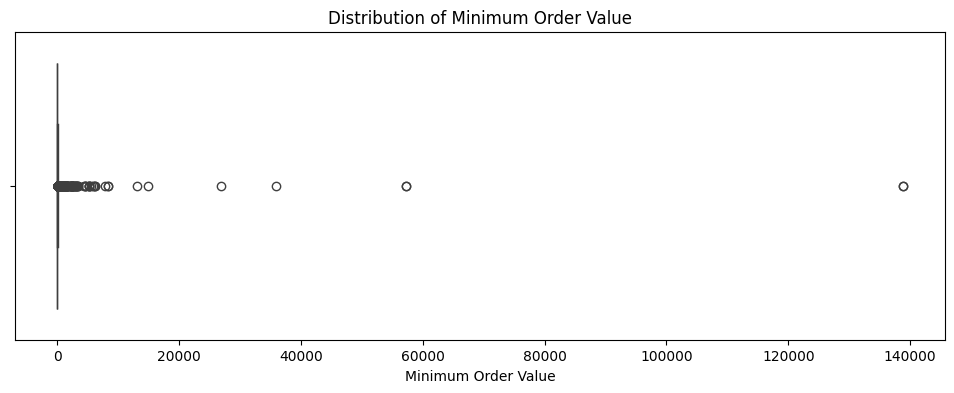

In [28]:
# Verify distribution and outliers in the order total amount

# Boxplot of minimum_order_value
plt.figure(figsize=(12, 4))

sns.boxplot(x=df_orders['order_total_amount'])
plt.title('Distribution of Minimum Order Value')
plt.xlabel('Minimum Order Value')

plt.show()


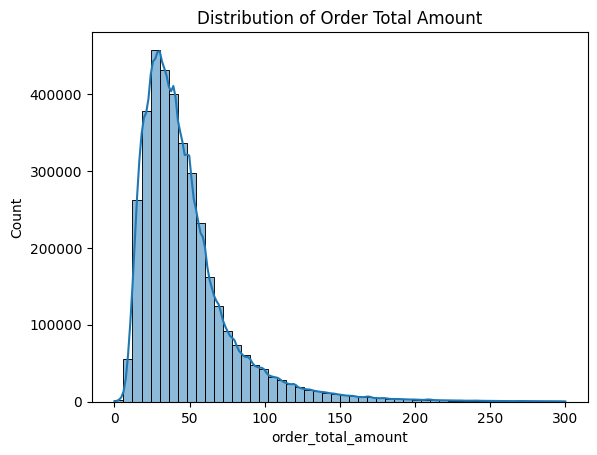

In [13]:
# Visualize the distribution
sns.histplot(df_orders[df_orders['order_total_amount'] < 300]['order_total_amount'], bins=50, kde=True)
plt.title('Distribution of Order Total Amount')
plt.show()

In [26]:
# Double checking the ouliers
#   0.01% of the orders has order_total_amount > 500 
df_orders[df_orders['order_total_amount'] > 500]

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
5778,36106561993,None,RAUL,SAO PAULO,BR,BROOKLIN PAULISTA,8717868,-46.69,-23.61,SP,...,06f331f426e4a05a93b1523f7c5fe88a9179ae67f067b4...,-46.69,-23.61,America/Sao_Paulo,2019-01-18T18:50:24.000Z,8f83550580a352fbf97646d2c8882e4d481880f1b833a5...,False,688.20,ANDROID,None
12464,12903073090,f68dace63ad662cf7b7f9c23cce389b72cd5bffef792c9...,PAULA,RIO DE JANEIRO,BR,IPANEMA,4413426,-43.19,-22.99,RJ,...,c9b78638d8289cecba042d914d729deaa381960c35752b...,-43.19,-22.99,America/Sao_Paulo,2019-01-26T22:28:28.000Z,7a43f1d1d747f866261100e5f644f33e62a6623091c8bf...,False,519.84,IOS,None
14908,90188603015,eab75b3259c5969d840f34b3e64e6e80baa3be87c250da...,GUILHERME,SAO PAULO,BR,PERDIZES,8689177,-46.68,-23.53,SP,...,ac47bc3072b062412a5778943a92c4000a7383dee305ff...,-46.68,-23.53,America/Sao_Paulo,2019-01-16T16:17:44.000Z,486912733e9a28d8b82ffc42c366784553edbc48a781f9...,False,510.00,IOS,None
19930,44889090963,1ad6f4db1f599dd280c1e260d38c10b39ac96f89aecc1d...,MARCOS,SAO PAULO,BR,JARDIM DAS BANDEIRAS,8755959,-46.68,-23.55,SP,...,406d2e3c6821456facf068adab789febde5f18b197f3c2...,-46.68,-23.55,America/Sao_Paulo,2019-01-17T14:22:14.000Z,f9f2b0a9d9f72a3d57114dbd438df8fc349b6893ca082a...,False,559.60,IOS,None
20588,37865484952,4a4833af9c470fb710755b158b91fb4211af1730bca712...,FLAVIA,SAO PAULO,BR,JARDIM UNIVERSIDADE PINHEIROS,2103670,-46.72,-23.55,SP,...,45e1d7ef3a3c033e7637f6f4ce460e0d4e92df38450543...,-46.72,-23.55,America/Sao_Paulo,2019-01-30T23:46:07.000Z,0001e917b8f8fb625a0022b3eec7db64acee013e4a6025...,False,633.00,IOS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657719,15714526653,e5eefb51ab8a9327ecd86fc8692c847b566bb89e44494b...,JOSÉ,RIO DE JANEIRO,BR,LEBLON,7089012,-43.23,-22.98,RJ,...,581950200c333e76615b1aa12995fc2f5e66a61515b2a6...,-43.23,-22.98,America/Sao_Paulo,2018-12-16T17:45:55.000Z,237d3f3addf9b4ed7348ca58cc29763782388d4d9cb623...,False,712.00,IOS,None
3659045,03449131953,3d0da33b70194d2b1d2db440c2053ba8202a450534db40...,DIAMANTIS,SAO PAULO,BR,JARDIM CORDEIRO,9519040,-46.68,-23.64,SP,...,6224160e16fdb03ba1dcb042c8db3c88c7b04089bf727a...,-46.68,-23.64,America/Sao_Paulo,2018-12-30T15:00:03.000Z,9aff466dafc1d0cff1176df4329b3db3abac2c9fdf8a13...,False,686.72,IOS,None
3666256,47997857872,e5eefb51ab8a9327ecd86fc8692c847b566bb89e44494b...,JOSÉ,RIO DE JANEIRO,BR,LEBLON,7089012,-43.23,-22.98,RJ,...,581950200c333e76615b1aa12995fc2f5e66a61515b2a6...,-43.23,-22.98,America/Sao_Paulo,2018-12-30T16:50:20.000Z,e52729216c82486800e1f7ddc54e7d939c3fa72c8c8291...,False,585.00,IOS,None
3666409,80981946352,0985c791dfee3bbc5ecc6e74d54f26542acdd93d601ecf...,PEDRO,SAO PAULO,BR,CERQUEIRA CESAR,9435435,-46.67,-23.56,SP,...,5f2d10940d72efe9f26f0e3e33c9ca16c12e953823e19a...,-46.67,-23.56,America/Sao_Paulo,2018-12-23T22:12:51.000Z,ec5e658126fa54d820bcdac9c34b1be1786affda6f1348...,False,502.00,IOS,None


In [17]:
# Average by city
print(df_orders.groupby('delivery_address_city')['order_total_amount'].mean().sort_values(ascending=False).head(20))

delivery_address_city
ITAJAI                  1543.292234
SAPUCAIA DO SUL          124.500000
CAMACARI                 121.700000
MARICA                    93.533333
SANTANA DE PARNAIBA       77.629692
RIO DAS OSTRAS            72.634375
FORMOSA                   68.771212
ITAGUAI                   66.032500
ITABORAI                  66.000000
JACAREI                   64.300000
CACHOEIRINHA              61.719324
SANTA BARBARA DOESTE      61.300000
CABO FRIO                 57.828859
NOVA LIMA                 57.699114
ALVORADA                  57.395000
GUARUJA                   57.124606
RESENDE                   56.705556
SAO PAULO                 56.582601
ALMIRANTE TAMANDARE       56.500000
SERTAOZINHO               56.055556
Name: order_total_amount, dtype: float64


In [25]:
# Checking Itajai -> If remove outloiers the total amount if very differnt
print("Qt of orders with outliers:",df_orders.query('delivery_address_city == "ITAJAI" and order_total_amount > 500')['order_id'].count())
print("Qt of orders:",df_orders.query('delivery_address_city == "ITAJAI"')['order_id'].count())
print("Mean of order total amount:",df_orders.query('delivery_address_city == "ITAJAI"')['order_total_amount'].mean())
print("Mean of total, without outliers:",df_orders.query('delivery_address_city == "ITAJAI" and order_total_amount < 500')['order_total_amount'].mean())

Qt of orders with outliers: 4
Qt of orders: 188
Mean of order total amount: 1543.2922340425534
Mean of total, without outliers: 51.41923913043478


In [34]:
# If we remove the outliers 
df_orders_no_outliers = df_orders[df_orders["order_total_amount"] < 500]
print(df_orders_no_outliers.groupby('delivery_address_city')['order_total_amount'].mean().sort_values(ascending=False).head(20))

delivery_address_city
SAPUCAIA DO SUL         124.500000
CAMACARI                121.700000
MARICA                   93.533333
SANTANA DE PARNAIBA      77.354867
RIO DAS OSTRAS           72.634375
FORMOSA                  68.771212
ITAGUAI                  66.032500
ITABORAI                 66.000000
JACAREI                  64.300000
CACHOEIRINHA             61.719324
SANTA BARBARA DOESTE     61.300000
CABO FRIO                57.828859
NOVA LIMA                57.699114
ALVORADA                 57.395000
GUARUJA                  57.124606
RESENDE                  56.705556
ALMIRANTE TAMANDARE      56.500000
SAO PAULO                56.287131
SERTAOZINHO              56.055556
ITU                      55.382143
Name: order_total_amount, dtype: float64


In [35]:
# Summary statistics for numerical columns
print(df_orders_no_outliers.describe())

       order_total_amount
count        3.670119e+06
mean         4.761209e+01
std          3.348043e+01
min          0.000000e+00
25%          2.690000e+01
50%          3.990000e+01
75%          5.740000e+01
max          4.999000e+02


In [37]:
# Merchants by total order amount
print(df_orders.groupby('merchant_id')['order_total_amount'].sum().sort_values(ascending=False).head(10))
print(df_orders_no_outliers.groupby('merchant_id')['order_total_amount'].sum().sort_values(ascending=False).head(10))

merchant_id
6c063dc7e137563bfc9aa1f9dab2a4cfec2756110bdaa89ee34e8483bd840b84    722839.00
b1d0b3921754c5ad1d1f3fe673922677e2ac67521915678e16a7bfae6eac1742    608126.90
df6ecff676a575aebf0ea6901b3edbe0abc8a5207cfce560540f078f2a343f30    606154.93
59f0b3f39cacecf79e5faca7f1ab61057311de0059cdc7b41bbc0b580cec258a    590009.15
8e35ea4e600facfb8763d86e403b849977f876729c14466c99518bcb0f4c4d0d    570750.19
5fb0f99afff413461dc30ee013cdda640799cfdbf33001f4288e681c96bd5cc5    556671.10
92fb1dda4064bfbd4bba3d2296feedc3e8b7b099472e1898c9853ad3bac5ecbe    551021.00
9334a66b3f7ef0587f5154944245b128853011662c7784e984edfa07ff148d1d    542796.80
b98480b6471b6c67e88634bb32c73e8d82962b8ae527e49d24c588f5d8b8517c    448842.76
e8f2980396deb519b6bf8f02d108bc6458d1544e8263ead3aeb82eb82168000e    412673.50
Name: order_total_amount, dtype: float64
merchant_id
6c063dc7e137563bfc9aa1f9dab2a4cfec2756110bdaa89ee34e8483bd840b84    707943.00
df6ecff676a575aebf0ea6901b3edbe0abc8a5207cfce560540f078f2a343f30    604902.13

In [67]:
df_orders['order_created_date'] = pd.to_datetime(df_orders['order_created_at'].str[:10])
df_orders['order_created_at'] = pd.to_datetime(df_orders['order_created_at'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3670826 entries, 0 to 3670825
Data columns (total 23 columns):
 #   Column                        Dtype              
---  ------                        -----              
 0   cpf                           object             
 1   customer_id                   object             
 2   customer_name                 object             
 3   delivery_address_city         object             
 4   delivery_address_country      object             
 5   delivery_address_district     object             
 6   delivery_address_external_id  object             
 7   delivery_address_latitude     object             
 8   delivery_address_longitude    object             
 9   delivery_address_state        object             
 10  delivery_address_zip_code     object             
 11  items                         object             
 12  merchant_id                   object             
 13  merchant_latitude             object             
 14  me

In [68]:
df_orders.head()

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date,order_created_date
0,80532101763,7ba88a68bb2a3504c6bd37a707af57a0b8d6e110a551c7...,GUSTAVO,FRANCA,BR,JARDIM ESPRAIADO,6736655,-47.39,-20.55,SP,...,-47.39,-20.55,America/Sao_Paulo,2019-01-17 22:50:06+00:00,33e0612d62e5eb42aba15b58413137e441fbe906de2feb...,False,46.0,ANDROID,None,2019-01-17
1,43352103961,078acecdcf7fa89d356bfa349f14a8219db1ee161ce28a...,MICHELLE,SANTOS,BR,CAMPO GRANDE,8759216,-46.34,-23.96,SP,...,-46.34,-23.96,America/Sao_Paulo,2019-01-17 17:51:26+00:00,148c4353a2952f3fe7973547283265eb22b575fb712ed2...,False,104.5,ANDROID,None,2019-01-17
2,38650991217,0e38a3237b5946e8ab2367b4f1a3ae6e77f1e215bc760c...,VICTOR,GUARULHOS,BR,JARDIM ROSSI,8765930,-46.53,-23.44,SP,...,-46.53,-23.44,America/Sao_Paulo,2019-01-17 22:53:47+00:00,c37e495a91b498bb7b70a9e09ac115d0cdd443f152dc11...,False,35.0,IOS,None,2019-01-17
3,63579726866,cab1a004b7206d07910092c515a79834fea0a03d7d9054...,ANNIE,SAO PAULO,BR,PARQUE SAO JORGE,7834087,-46.57,-23.53,SP,...,-46.57,-23.53,America/Sao_Paulo,2019-01-17 23:56:53+00:00,b4df94142d21354611247da9ca94f870c09b93989b531a...,False,40.8,IOS,None,2019-01-17
4,90617788806,aa7edf5b166b8c843aec3b96dc561222888734f3879123...,DANIEL,VITORIA,BR,JARDIM CAMBURI,7211683,-40.27,-20.25,ES,...,-40.27,-20.25,America/Sao_Paulo,2019-01-17 23:40:53+00:00,4ff64b33b272c1886df21b63272220af6a82d1667dba70...,False,48.5,ANDROID,None,2019-01-17


In [ ]:
#Orders by hour of the day
df_orders['order_hour'] = df_orders['order_created_at'].dt.hour
print(df_orders['order_hour'].value_counts().sort_index())

order_hour
0     445720
1     216778
2      89824
3      33037
4      14023
5       5958
6       2360
7        871
8        261
9        196
10       520
11      1639
12     11711
13    102351
14    225930
15    231503
16    161042
17     97455
18     65391
19     61173
20    157230
21    387623
22    682457
23    675773
Name: count, dtype: int64


In [41]:
df_dup = df_orders[df_orders["order_id"].duplicated(keep=False) == True]
df_dup[['order_id', 'order_created_at', 'customer_id', 'merchant_id', 'order_total_amount', 'delivery_address_latitude', 'delivery_address_longitude']].sort_values(by="order_id").head()

,order_id,order_created_at,customer_id,merchant_id,order_total_amount,delivery_address_latitude,delivery_address_longitude
3115963,00000b67fac8e2e295f9d9ae7ccb443ac1269d5abd828a...,2018-12-06T23:56:47.000Z,4a5eac97fcc0d807305a0dc12bcd77e6aa1f46db1caa41...,1a6dfd9abd3bdf47de965edfd19e261b43ba5337f9455a...,35.90,-45.87,-23.19
1879526,00000b67fac8e2e295f9d9ae7ccb443ac1269d5abd828a...,2019-01-05T23:56:47.000Z,4a5eac97fcc0d807305a0dc12bcd77e6aa1f46db1caa41...,1a6dfd9abd3bdf47de965edfd19e261b43ba5337f9455a...,35.90,-45.87,-23.19
3539904,00000fa3ee5165ced42ab24200fa71ac0996ffad1959e0...,2018-12-26T00:33:14.000Z,c1c7126ad0d6ca68eaf2e57d8141540c66cfea84c0292c...,9b9a1db6774b8d49df797e6589a6260460fc318c523c39...,25.42,-43.98,-19.93
2301307,00000fa3ee5165ced42ab24200fa71ac0996ffad1959e0...,2019-01-25T00:33:14.000Z,c1c7126ad0d6ca68eaf2e57d8141540c66cfea84c0292c...,9b9a1db6774b8d49df797e6589a6260460fc318c523c39...,25.42,-43.98,-19.93
1305849,0000226b0983a454ebe2bb26c853f7bd66f54c9158221f...,2019-01-23T23:30:01.000Z,daa25fa7b34ed201fc3367c9eb77e24bbe9c934c4c7023...,dcb6dcdf1629fffabb34ecf57a885e7abaf07dea4ec497...,37.50,-48.64,-27.59


In [44]:
df_dup[df_dup["order_id"].str.contains('00000fa3ee5165ced42ab24200fa71ac0996ffad1959e0') == True]

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
2301307,48407845939,c1c7126ad0d6ca68eaf2e57d8141540c66cfea84c0292c...,ANA,BELO HORIZONTE,BR,NOVA SUISSA,9023992,-43.98,-19.93,MG,...,9b9a1db6774b8d49df797e6589a6260460fc318c523c39...,-43.98,-19.93,America/Sao_Paulo,2019-01-25T00:33:14.000Z,00000fa3ee5165ced42ab24200fa71ac0996ffad1959e0...,False,25.42,IOS,None
3539904,00939442255,c1c7126ad0d6ca68eaf2e57d8141540c66cfea84c0292c...,ANA,BELO HORIZONTE,BR,NOVA SUISSA,9023992,-43.98,-19.93,MG,...,9b9a1db6774b8d49df797e6589a6260460fc318c523c39...,-43.98,-19.93,America/Sao_Paulo,2018-12-26T00:33:14.000Z,00000fa3ee5165ced42ab24200fa71ac0996ffad1959e0...,False,25.42,IOS,None


In [48]:
def filter_valid_cpfs(df):
    """
    Filters the DataFrame to keep only rows where 'cpf' has exactly 11 digits
    after removing leading zeros.
    """
    df['cpf'] = df['cpf'].astype(str).str.replace(r'\D', '', regex=True).str.lstrip('0')
    return df[df['cpf'].str.len() == 11].copy()
    
df_dup = filter_valid_cpfs(df_dup)

df_dup[df_dup["order_id"].duplicated(keep=False) == True].sort_values(by="order_id")

,cpf,customer_id,customer_name,delivery_address_city,delivery_address_country,delivery_address_district,delivery_address_external_id,delivery_address_latitude,delivery_address_longitude,delivery_address_state,...,merchant_id,merchant_latitude,merchant_longitude,merchant_timezone,order_created_at,order_id,order_scheduled,order_total_amount,origin_platform,order_scheduled_date
1305849,77024981760,daa25fa7b34ed201fc3367c9eb77e24bbe9c934c4c7023...,THAMIRES,SAO JOSE,BR,FORQUILHINHAS,8796131,-48.64,-27.59,SC,...,dcb6dcdf1629fffabb34ecf57a885e7abaf07dea4ec497...,-48.64,-27.59,America/Sao_Paulo,2019-01-23T23:30:01.000Z,0000226b0983a454ebe2bb26c853f7bd66f54c9158221f...,False,37.5,ANDROID,None
2545826,68600842117,daa25fa7b34ed201fc3367c9eb77e24bbe9c934c4c7023...,THAMIRES,SAO JOSE,BR,FORQUILHINHAS,8796131,-48.64,-27.59,SC,...,dcb6dcdf1629fffabb34ecf57a885e7abaf07dea4ec497...,-48.64,-27.59,America/Sao_Paulo,2018-12-24T23:30:01.000Z,0000226b0983a454ebe2bb26c853f7bd66f54c9158221f...,False,37.5,ANDROID,None
2540053,95390637688,609d8e3978b79e4824b22c575212c72e9f50a6a8b88892...,EDUARDO,SAO PAULO,BR,PERDIZES,2014065,-46.67,-23.54,SP,...,92c1d4246ae9de825e61b6d841f01939bba4e200f14801...,-46.67,-23.54,America/Sao_Paulo,2018-12-07T23:05:29.000Z,0000438bc9201fcb3e8ad30ce1b72013669ed0a543cb64...,False,60.0,IOS,None
1304364,95279027565,609d8e3978b79e4824b22c575212c72e9f50a6a8b88892...,EDUARDO,SAO PAULO,BR,PERDIZES,2014065,-46.67,-23.54,SP,...,92c1d4246ae9de825e61b6d841f01939bba4e200f14801...,-46.67,-23.54,America/Sao_Paulo,2019-01-06T23:05:29.000Z,0000438bc9201fcb3e8ad30ce1b72013669ed0a543cb64...,False,60.0,IOS,None
3645367,37035660807,875bdfb8f3f2341243cb0cab53c4ec3ebff7b3deb29a17...,JOZY,SANTO ANDRE,BR,PARQUE ORATORIO,8940479,-46.51,-23.63,SP,...,b313982ef045704cca755041cebac73a8b136ea2e32a44...,-46.51,-23.63,America/Sao_Paulo,2018-12-29T22:45:47.000Z,000052bf31bab2f3a3a6585ee3953605e302424a52d998...,False,36.5,IOS,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171988,52172218230,f87f049abd086a6dd55829c339cfd0cc6fcc17ed476ff5...,CAROLINE,MANAUS,BR,ADRIANOPOLIS,2930505,-60.00,-3.09,AM,...,32f3e9e9715939e23db3d9078086bb33dd5cdce7014043...,-60.00,-3.09,America/Manaus,2019-01-26T22:12:27.000Z,ffffa0bfd11b0c6a062a4726b0302537f5cdfdaa27912d...,False,84.8,ANDROID,None
3159769,74080472512,2859657100d49a7c883f66f10a9aa5d44faf56acb655a8...,DUYLE,FLORIANOPOLIS,BR,ITACORUBI,8012444,-48.51,-27.58,SC,...,ca91af99643835c7a505f4eff1d66b56d7d0b8e8b5f8f9...,-48.51,-27.58,America/Sao_Paulo,2018-12-19T00:00:56.000Z,ffffcde0cb4923ff376dffc83b3f8139eabaf387a61de1...,False,47.9,ANDROID,None
1921026,50173712716,2859657100d49a7c883f66f10a9aa5d44faf56acb655a8...,DUYLE,FLORIANOPOLIS,BR,ITACORUBI,8012444,-48.51,-27.58,SC,...,ca91af99643835c7a505f4eff1d66b56d7d0b8e8b5f8f9...,-48.51,-27.58,America/Sao_Paulo,2019-01-18T00:00:56.000Z,ffffcde0cb4923ff376dffc83b3f8139eabaf387a61de1...,False,47.9,ANDROID,None
2934230,18811417075,e314b1f23d8ce4cab5005d684937e3315686d8103695e8...,RODRIGO,SAO PAULO,BR,CIDADE MONCOES,5901592,-46.69,-23.60,SP,...,4b959e11fdcc80aad845232c9067caed60c29583c77c74...,-46.69,-23.60,America/Sao_Paulo,2018-12-31T00:38:49.000Z,ffffd1b19ed134e9be22fb6c77ffb44ee6b3a57074a45a...,False,30.6,IOS,None


<br></br>
# AB Test

In [4]:
df_ab = pd.read_parquet("../data/extracted/ab_test.parquet")
df_ab.head()

,customer_id,is_target
0,755e1fa18f25caec5edffb188b13fd844b2af8cf5adedc...,target
1,b821aa8372b8e5b82cdc283742757df8c45eecdd72adf4...,control
2,d425d6ee4c9d4e211b71da8fc60bf6c5336b2ea9af9cc0...,control
3,6a7089eea0a5dc294fbccd4fa24d0d84a90c1cc12e829c...,target
4,dad6b7e222bab31c0332b0ccd9fa5dbd147008facd268f...,control
